In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.layers import Dropout
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

In [234]:
# importation de WARNING
import warnings
warnings.filterwarnings("ignore")

In [235]:
data = pd.read_csv("../BISIMWA M DESTIN/Book1 (1).csv")

In [236]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [237]:
# Détail du dataset(598 lignes et 13 colones)
data.shape

(45211, 17)

In [238]:
# Les noms des colones dont dispose le dataset
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [239]:
# ça donne les informations générales sur le dataset et détermine le type de données pour chaque colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [240]:
# Ici ça determine combien des clients ont des maisons à mettre en gage
# Donc la f(x) < .VALUE_COUNTS()> ne fait que compter les lignes de la colone cible
data['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [241]:
# Ici ça determine combien des clients ont des maisons à mettre en gage
# Donc la f(x) < .VALUE_COUNTS()> ne fait que compter les lignes de la colone cible
data['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [242]:
# Pour identifier les colonnes ayant des valeurs vides et cobien des vides pour chaque colonne
# Dans notre dataset y pas des colonnes possedant des valeurs vides
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

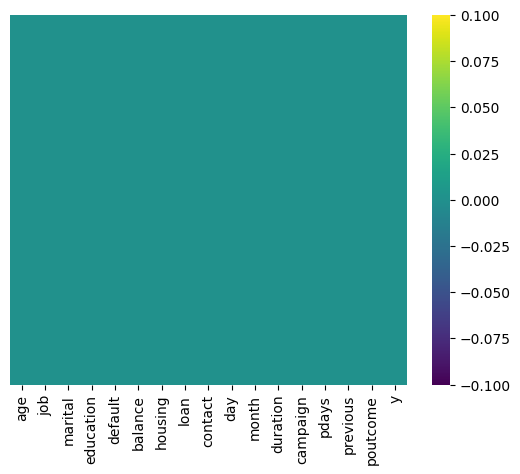

In [243]:
# CA PRESENTE JUSTE DES COULEURS PCK Y A PAS DES COLONNES VIDES DANS LE DATASET
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')

<Axes: >

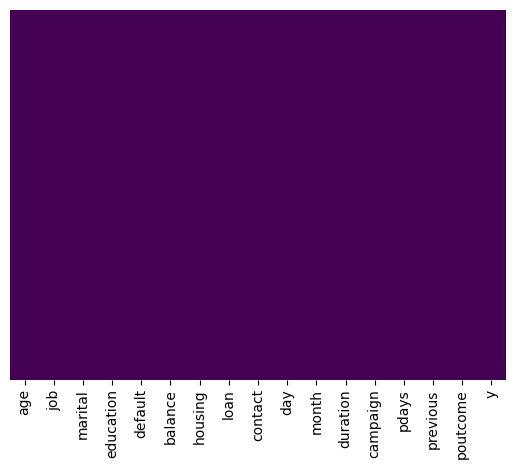

In [244]:
# CELUI-CI C LE CONTRAIRE DE CELUI QUI EST EN HAUT, LUI NE PEUT PAS AFFICHER LES LIGNES PCK SON cbr EST EN False
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [245]:
colonne_critere = data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 
       'previous', 'poutcome', 'y']]

In [246]:
colonne_critere

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,unknown,no


In [247]:
col_encoded = LabelEncoder()
list_object = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 
       'previous', 'poutcome', 'y']
for encoded in list_object:
    colonne_critere[encoded] = col_encoded.fit_transform(colonne_critere[encoded])

In [248]:
colonne_critere

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,3,0


<Axes: >

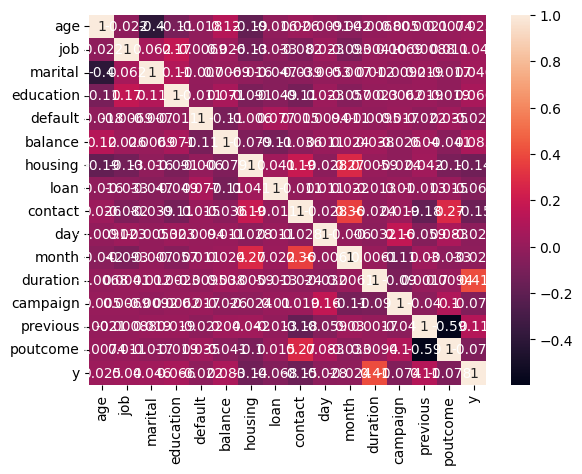

In [249]:
# LA MATRICE DE CORRELATION
sns.heatmap(colonne_critere.corr(), annot=True)

In [250]:
from sklearn.model_selection import train_test_split
#X = data.drop(['Loan_Status'], axis = 1)
X = colonne_critere.iloc[:,:-1]
y = colonne_critere.iloc[:,-1]
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)
print("X_train:", X_train.shape )
print("X_test:", X_test.shape )
print("Y_train:", y_train.shape )
print("Y_test:", y_test.shape )

X_train: (31647, 15)
X_test: (13564, 15)
Y_train: (31647,)
Y_test: (13564,)


# CONSTRUCTION DU DEEP LEARNING 

In [251]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout,Dense


In [252]:
model_dnn = Sequential()

In [253]:
# AJOUT DE LA 1ère COUCHE
model_dnn.add(Dense(10, input_shape=(15,), activation='relu'))

# AJOUT DE INTERMEDIAIRE 1
model_dnn.add(Dense(25, activation='relu'))
model_dnn.add(Dense(25, activation='relu'))

# AJOUT DE INTERMEDIAIRE 2
model_dnn.add(Dense(10, activation='relu'))
model_dnn.add(Dropout(0.5))

# AJOUT DE INTERMEDIAIRE 3
model_dnn.add(Dense(20, activation='relu'))


# COUCHE DE SORTIE
model_dnn.add(Dense(1, activation='sigmoid'))


model_dnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_dnn.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 25)             │           275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,586 (6.20 KB)

 Trainable params: 1,586 (6.20 KB)

 Non-trainable params: 0 (0.00 B)

In [254]:
history = model_dnn.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
989/989 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8210 - loss: 6.4939 - val_accuracy: 0.8856 - val_loss: 0.3940
Epoch 2/100
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8799 - loss: 0.3695 - val_accuracy: 0.8864 - val_loss: 0.3353
Epoch 3/100
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8874 - loss: 0.3344 - val_accuracy: 0.8857 - val_loss: 0.3369
Epoch 4/100
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8812 - loss: 0.3424 - val_accuracy: 0.8872 - val_loss: 0.3265
Epoch 5/100
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8863 - loss: 0.3367 - val_accuracy: 0.8857 - val_loss: 0.3496
Epoch 6/100
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8836 - loss: 0.3411 - val_accuracy: 0.8857 - val_loss: 0.3427
Epoch 7/100
989/989 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8833 - loss: 0.3418 - val_accuracy: 0.8864 - val_loss: 0.3244
Epoch 8/100
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8854 - loss: 0.3370 - val_accu

# EVALUATION DU MODEL DU DEEP LEARNING

In [255]:
model_dnn.evaluate(X_test, y_test)

424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8866 - loss: 0.2934


[0.2917976975440979, 0.8867590427398682]

In [256]:
resultats = model_dnn.evaluate(X_test, y_test)

424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8866 - loss: 0.2934


In [257]:
print("Loss:", resultats[0])
print("Accuracy:", resultats[1])

Loss: 0.2917976975440979
Accuracy: 0.8867590427398682


In [258]:
# VISUALISATION DE L'EVOLUTION DE L'ENTRAINEMENT DU Rx DE NEURONE
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']


epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

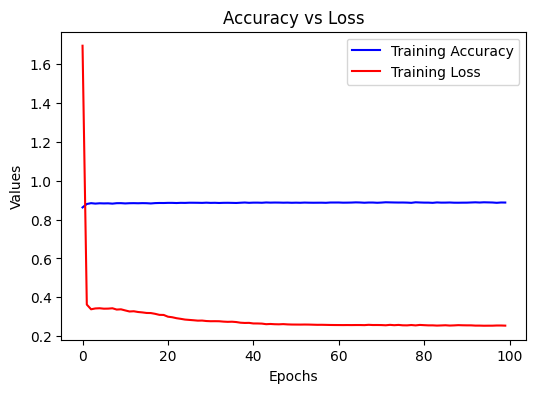

In [259]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color = 'blue', label = 'Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color = 'red', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Accuracy vs Loss')
plt.legend()
plt.show()


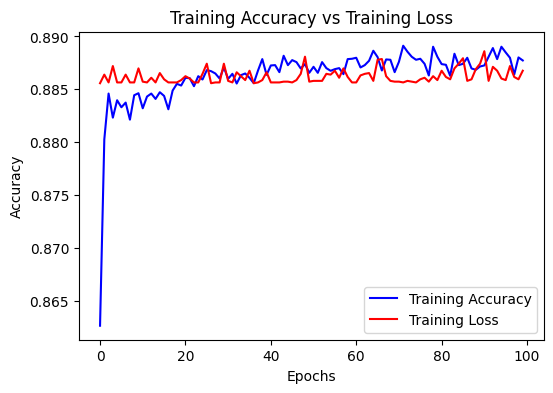

In [260]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color = 'blue', label = 'Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color = 'red', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Training Loss')
plt.legend()
plt.show()

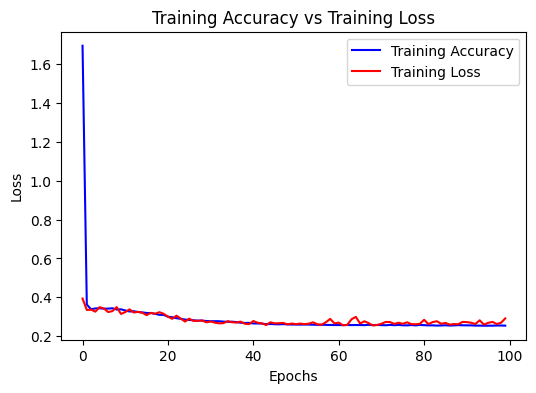

In [261]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color = 'blue', label = 'Training Accuracy')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color = 'red', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Accuracy vs Training Loss')
plt.legend()
plt.show()

# FAIRE UNE SIMPLE PREDICTION

In [262]:
#y_predict_model_dnn = model_dnn.predict(X_test)
#y_predict_model_dnn

y_predict_model_dnn = np.array([[1,	0,	0,	1,	0,	368,	0,	98,	9,	2]])
y_predict_model_dnn

array([[  1,   0,   0,   1,   0, 368,   0,  98,   9,   2]])